In [1]:
import numpy as np

In [3]:
def extract_inrange(input_array, start, stop):
    """
    input_array: 1d ndarray 
    start: int
    stop: int
    return: 1d ndarray / an input array without values from start to stop including
    """
    return input_array[((input_array > start)) & ((input_array < stop))]



np.random.seed(11)
my_array = np.random.random(15)
print(my_array, '\n')
print(extract_inrange(my_array, 0.3, 0.5), '\n')
print(extract_inrange(my_array, 0.5, 1.5))

[0.18026969 0.01947524 0.46321853 0.72493393 0.4202036  0.4854271
 0.01278081 0.48737161 0.94180665 0.85079509 0.72996447 0.10873607
 0.89390417 0.85715425 0.16508662] 

[0.46321853 0.4202036  0.4854271  0.48737161] 

[0.72493393 0.94180665 0.85079509 0.72996447 0.89390417 0.85715425]


In [6]:
def nearest_value(input_array, value):
    """
    input array: 1d ndarray
    value: float
    return: float, int / value and index from an array
    """
    min, min_index = 1e+6, 0
    for index,value_array in enumerate(input_array):
        delta = abs(value - value_array)
        if(min > delta):
            min = delta
            min_index = index
    return tuple([input_array[min_index],min_index])



np.random.seed(11)
my_array = np.random.uniform(0,1,10)

print(my_array)
print(nearest_value(my_array, 0.5))

[0.18026969 0.01947524 0.46321853 0.72493393 0.4202036  0.4854271
 0.01278081 0.48737161 0.94180665 0.85079509]
(0.4873716073198716, 7)


In [18]:
def moving_average(input_array, w):
    """
    input_array: 1d nd array
    w: int / window
    return: 1d ndarray
    """
    shift = w//2 + w%2 - 1
    output_array = np.empty(input_array.size - w + 1)
    for i in range(input_array.size):
        if(w % 2 == 0):
            a = i - (w // 2) + 1    
        else:
            a = i - (w // 2)
        b = i + (w // 2)
        #print(a,b)
        if(a < 0 or b >= input_array.size):
            continue
        output_array[i - shift] = input_array[a:b+1].sum() / w
    return output_array

np.random.seed(11)
input_array = np.random.randint(10, size=10)

print(input_array)
print(['{:.3f}'.format(el) for el in moving_average(input_array, 4)])

[9 0 1 7 1 7 2 8 0 0]
['4.250', '2.250', '4.000', '4.250', '4.500', '4.250', '2.500']


In [37]:
def find_repetition(input_array, item, n):
    """
    input_array: ndarray
    item: int / a target value
    n: int / number of repetition
    return: int / index
    """
    item_index = None
    count = 0
    for index, value in enumerate(input_array):
        if(value == item):
            count += 1
            if (count == n):
                item_index = index
    if(item_index == None):
        if(count == 0):
            print(f"There is no \"{item}\" in the input array")
        elif(count < n):
            print(f"There are less \"{item}\" than {n}")

    return item_index

input_array = np.array([1, 2, 2, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])

print(input_array)
print(find_repetition(input_array, 0, 3), '\n')
print(find_repetition(input_array, 4, 5), '\n')
print(find_repetition(input_array, 1, 3))

[1 2 2 1 3 4 3 1 1 2 1 1 2]
There is no "0" in the input array
None 

There are less "4" than 5
None 

7


In [45]:
def mark_first(input_array):
    """
    input_array: 1d ndarray 
    return: 1d ndarray / boolean mask
    """
    glosary = []
    output_array = np.empty(input_array.size,dtype=np.bool8)
    for index, value in enumerate(input_array):
        if value in glosary:
            output_array[index] = False
        else:
            output_array[index] = True
            glosary.append(value)
    return output_array



np.random.seed(11)
input_array = np.random.randint(0, 5, 10)

print(input_array)
print(mark_first(input_array))

[1 0 3 1 4 1 2 0 4 0]
[ True  True  True False  True False  True False False False]


In [79]:
def min_by_max(my_array):
    """
    my_array: 2d ndarray
    return: 1d ndarray / row vector
    """
    
    return np.asarray(list(map(lambda x: np.min(x)/np.max(x), my_array.transpose()[:])))

np.random.seed(11)
my_array = np.random.randint(1,100, [5,3])
print(my_array, '\n')
#print(min_by_max(my_array))
print(['{:.4f}'.format(el) for el in min_by_max(my_array)])

[[26 64 81]
 [92 82 56]
 [14 77 34]
 [72 83 25]
 [93 49 33]] 

[0.15053763 0.59036145 0.30864198]
['0.1505', '0.5904', '0.3086']


In [90]:
def cart2polar(cart_coord):
    """
    cart: 2d ndarray / rows are x and y
    return:  2d ndarray / rows are distance and angle
    """
    def transform(x,y):
        fi = np.pi/2.
        if(x > 0):
            if(y >= 0):
                fi = np.arctan(y/x)
            else:
                fi = np.arctan(y/x) + 2*np.pi
        elif(x < 0):
            fi = np.arctan(y/x) + np.pi
        elif(x == 0):
            if(y < 0):
                fi = 3*np.pi/2.
        r = np.power(np.power(x,2) + np.power(y,2),0.5)
        return r, fi
    
    tr = np.vectorize(transform)
    
    return np.asarray(tr(cart_coord[:,0],cart_coord[:,1])).transpose().reshape(-1,2) 

np.random.seed(11)
my_array = np.random.random((6,2))
print(my_array, '\n')
print(cart2polar(my_array))

[[0.18026969 0.01947524]
 [0.46321853 0.72493393]
 [0.4202036  0.4854271 ]
 [0.01278081 0.48737161]
 [0.94180665 0.85079509]
 [0.72996447 0.10873607]] 

[[0.18131863 0.10761654]
 [0.860291   1.00220684]
 [0.64203624 0.857294  ]
 [0.48753916 1.54457837]
 [1.26919347 0.73467107]
 [0.73801874 0.14787343]]


57 57 3 1


(-0.5, 56.5, 56.5, -0.5)

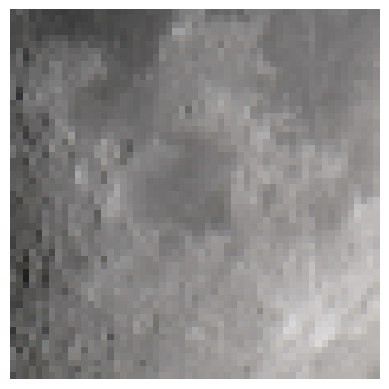

In [175]:
import matplotlib.pyplot as plt 
from matplotlib import image

moon = image.imread('moon.jpg')

y_grid = 4 #int(12 / 3)
x_grid = 3 #int(12 / 4)

y_size = np.shape(moon)[0] // y_grid
y_shift = np.shape(moon)[0] % y_grid

x_size = np.shape(moon)[1] // x_grid
x_shift = np.shape(moon)[1] % x_grid

y_size_origin = np.shape(moon)[0] - y_shift
x_size_origin = np.shape(moon)[1] - x_shift

print(y_size,x_size,y_shift,x_shift)

moon = np.asarray(moon)[y_shift:,x_shift:,:]

pixel_info_size = np.shape(moon)[2]

moon = moon.reshape(y_size*y_grid*x_grid,x_size*pixel_info_size).transpose().reshape(x_size*pixel_info_size,y_size*y_grid,x_grid).transpose().reshape(x_grid*y_grid,x_size*pixel_info_size*y_size).transpose().reshape(x_size*pixel_info_size*y_size,x_grid,y_grid).transpose().reshape(y_grid,x_grid,y_size,x_size,pixel_info_size)
#print(moon)
plt.imshow(moon[2,1])
plt.axis('off')